In [1]:
import pandas as pd

df = pd.read_csv('./포트홀 데이터.csv')

# UID에서 연도, 월, 일을 추출하는 함수 정의
def extract_date(uid):
    # UID 형식은 'RAD01_YYYYMMDDHHMMSS_ID' 형식
    date_str = uid.split('_')[1]  # 'YYYYMMDDHHMMSS' 부분 추출
    year = '20' + date_str[:2]
    month = date_str[2:4]
    day = date_str[4:6]
    return int(year), int(month), int(day)

# 각 행에 대해 연도, 월, 일을 추출하여 새로운 컬럼 추가
df[['Year', 'Month', 'Day']] = df['DTCT_UID'].apply(lambda x: pd.Series(extract_date(x)))

# 필요한 컬럼만 선택하여 새로운 DataFrame 생성
new_df = df[['Year', 'Month', 'Day', 'PLC_LTTD', 'PLC_LGTD']]

# CSV 파일로 저장 (예: 'processed_pothole_data.csv')
new_df.to_csv('processed_pothole_data.csv', index=False, encoding='cp949')

p_df = pd.read_csv('./processed_pothole_data.csv', encoding='cp949')

result_df = p_df.groupby(['Year', 'Month', 'Day']).size().reset_index(name='Pothole_Count')

# 필요한 경우 CSV 파일로 저장
result_df.to_csv('processed_pothole_count_data.csv', index=False, encoding='cp949')

# 결과 확인
print(new_df.head(), end="\n#########################################\n")
print(result_df.head())

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv('./기온 데이터.csv', encoding='cp949')

print(df.columns)

# '일시' 컬럼에서 연도, 월, 일 정보를 추출하여 새로운 컬럼 추가
df['Year'] = pd.to_datetime(df['일시']).dt.year.astype(int)
df['Month'] = pd.to_datetime(df['일시']).dt.month.astype(int)
df['Day'] = pd.to_datetime(df['일시']).dt.day.astype(int)

# 새로운 DataFrame 생성
new_df = df[['Year', 'Month', 'Day', '평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '일교차']]

# CSV 파일로 저장
new_df.to_csv('processed_temperature_data.csv', index=False, encoding='cp949')

# 새로 생성된 테이블 확인
new_df.head()

Index(['일시', '평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '일교차'], dtype='object')


,Year,Month,Day,평균기온(℃),최고기온(℃),최저기온(℃),일교차
0,2024,1,1,3.8,9.0,-0.2,9.2
1,2024,1,2,4.0,6.4,1.5,4.9
2,2024,1,3,1.9,5.9,-1.2,7.1
3,2024,1,4,1.0,7.2,-3.7,10.9
4,2024,1,5,5.6,9.2,0.6,8.6


In [ ]:
df = pd.read_csv('./강수량 데이터.csv', encoding='cp949')

print(df.columns)

# '일시' 컬럼에서 연도, 월, 일 정보를 추출하여 새로운 컬럼 추가
df['Year'] = pd.to_datetime(df['일시']).dt.year.astype(int)
df['Month'] = pd.to_datetime(df['일시']).dt.month.astype(int)
df['Day'] = pd.to_datetime(df['일시']).dt.day.astype(int)

# 새로운 DataFrame 생성
new_df = df[['Year', 'Month', 'Day', '강수량(mm)']]

# NaN 값을 0으로 대체
new_df['강수량(mm)'] = new_df['강수량(mm)'].fillna(0.0)

# CSV 파일로 저장
new_df.to_csv('./processed_rain_data.csv', index=False, encoding='cp949')

# 새로 생성된 테이블 확인
new_df.head()

Index(['일시', '강수량(mm)', '1시간최다강수량(mm)'], dtype='object')


C:\Users\user\AppData\Local\Temp\ipykernel_33612\2495324354.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['강수량(mm)'] = new_df['강수량(mm)'].fillna(0.0)


,Year,Month,Day,강수량(mm)
0,2024,1,1,0.0
1,2024,1,2,0.0
2,2024,1,3,0.2
3,2024,1,4,0.0
4,2024,1,5,0.0


In [ ]:
# 교통량 데이터 처리
df = pd.read_csv('./교통량 데이터.csv', encoding='cp949')

# 유성구 도로 목록
yuseong_roads = [
    '가정로', '계룡로', '계백로', '노은길', '노은로', '문지로', '자양로',
    '도안대로', '도안동로', '도안중로', '엑스포로', '유성대로',
    '현충원로', '구즉세종로', '북유성대로', '월드컵대로', '구즉세종로', 
    '대학로(1)', '배울1로', '동서대로2', '한밭대로'
]

filtered_df = df[df['도로'].isin(yuseong_roads)]

# '월' 컬럼을 기준으로 데이터 피벗
pivot_df = filtered_df.pivot_table(
    index='월',                # 행: 월
    columns='도로',            # 열: 도로
    values='총교통량',          # 값: 교통량
    fill_value=None              # NaN은 그대로 유지
).reset_index()

# '월' 컬럼에서 년과 월 숫자로 분리
pivot_df['Year'] = pivot_df['월'].str.extract(r'(\d{4})').astype(int)  # '2024년'에서 숫자 추출 후 정수 변환
pivot_df['Month'] = pivot_df['월'].str.extract(r'(\d{2})월').astype(int)  # '01월'에서 숫자 추출 후 정수 변환

# '월' 컬럼 제거
pivot_df = pivot_df.drop(columns=['월'])

# 컬럼 순서를 변경하여 'Year'와 'Month'를 앞으로 이동
columns_order = ['Year', 'Month'] + [col for col in pivot_df.columns if col not in ['Year', 'Month']]
pivot_df = pivot_df[columns_order]

# 월별 총교통량 계산
pivot_df['총교통량'] = pivot_df.drop(columns=['Year', 'Month']).sum(axis=1)

pivot_df.to_csv('./processed_traffic_data.csv', encoding='cp949', index=False)

pivot_df


도로,Year,Month,가정로,계룡로,계백로,구즉세종로,노은길,노은로,대학로(1),도안대로,...,문지로,배울1로,북유성대로,엑스포로,월드컵대로,유성대로,자양로,한밭대로,현충원로,총교통량
0,2024,1,25399,52420,51305,39810,14631,26371,19240,28994,...,9882,12648,66662,30292,25360,33386,22570,72661,36846,661800
1,2024,2,24446,52955,51753,40068,14758,25919,19200,27960,...,9564,12401,67612,29993,23323,32818,22515,73572,38201,659595
2,2024,3,25517,54980,52724,40356,15199,27525,20303,28761,...,9902,12790,69313,30857,24139,34236,23765,76357,41100,682478
3,2024,4,27109,56591,53013,41021,15510,28548,21344,28304,...,10295,13078,70352,31165,25876,34533,24232,77281,44724,696768
4,2024,5,26058,56097,52838,40712,15426,28025,20481,28157,...,10230,13594,72287,31107,25714,33905,24565,76738,43255,692701
5,2024,6,25220,55991,52330,40354,15683,27899,20003,26672,...,9805,13769,74610,31077,25207,33451,23683,75771,44817,689378
6,2024,7,26770,57175,50020,40724,15728,28211,20477,28643,...,10368,13950,71754,31294,25534,32994,23212,74197,43143,687646
7,2024,8,25746,55392,50020,40811,15729,27452,19900,29304,...,9791,13855,72878,31278,24708,32332,23599,76720,44280,685522
8,2024,9,24674,56240,50269,41317,15576,27138,19019,34443,...,9533,13832,68377,30004,24303,32402,23832,76439,43869,683377
9,2024,10,24766,57028,50208,41816,15353,27078,19063,35136,...,9707,13826,68560,30646,23700,33399,23723,76653,44364,686884


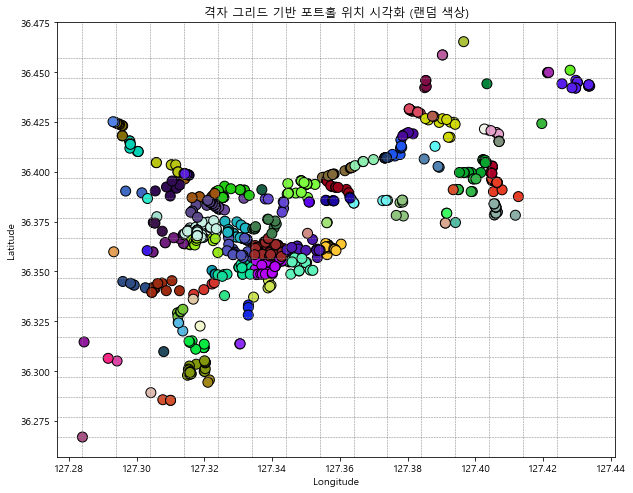

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')

# 데이터 로드
p_df = pd.read_csv('./processed_pothole_data.csv', encoding='cp949')

# 격자 설정: 위도와 경도의 전체 범위를 포함하도록 설정
grid_size = 0.01  # 격자 간격 설정

# 위도 및 경도의 최소값과 최대값 구하기
min_lat, max_lat = p_df['PLC_LTTD'].min(), p_df['PLC_LTTD'].max()
min_lon, max_lon = p_df['PLC_LGTD'].min(), p_df['PLC_LGTD'].max()

# 격자 위치 계산 (포인트가 속한 셀 찾기)
p_df['Grid_X'] = ((p_df['PLC_LTTD'] - min_lat) // grid_size).astype(int)
p_df['Grid_Y'] = ((p_df['PLC_LGTD'] - min_lon) // grid_size).astype(int)

# 그룹화하여 각 격자 셀에 고유한 ID 할당
p_df['Grid_ID'] = p_df.groupby(['Grid_X', 'Grid_Y']).ngroup()

# 각 Grid_ID에 대해 랜덤 색상 할당
unique_ids = p_df['Grid_ID'].unique()
np.random.seed(42)  # 재현성을 위해 시드 설정
random_colors = {grid_id: np.random.rand(3,) for grid_id in unique_ids}
p_df['Color'] = p_df['Grid_ID'].map(random_colors)

# 시각화
plt.figure(figsize=(10, 8))
plt.scatter(p_df['PLC_LGTD'], p_df['PLC_LTTD'], color=p_df['Color'].tolist(), s=100, edgecolor='k')
plt.title("격자 그리드 기반 포트홀 위치 시각화 (랜덤 색상)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# 격자 경계선을 추가하여 표시
for x in np.arange(min_lon, max_lon, grid_size):
    plt.axvline(x, color='grey', linestyle='--', linewidth=0.5)
for y in np.arange(min_lat, max_lat, grid_size):
    plt.axhline(y, color='grey', linestyle='--', linewidth=0.5)

plt.grid(False)
plt.show()

# 각 포인트별 그리드 아이디를 추가해서 processed_pothole_data.csv 에 새로운 컬럼으로 저장하고 그리드별 포트홀 개수에 따른 그라데이션 히트맵 비슷하게 그래프 그리기

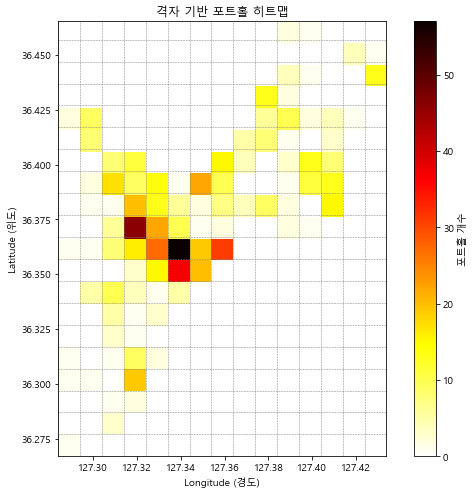

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')

# 데이터 로드
p_df = pd.read_csv('./processed_pothole_data.csv', encoding='cp949')

# 격자 설정: 위도와 경도의 전체 범위를 포함하도록 설정
grid_size = 0.01  # 격자 간격 설정

# 위도 및 경도의 최소값과 최대값 구하기
min_lat, max_lat = p_df['PLC_LTTD'].min(), p_df['PLC_LTTD'].max()
min_lon, max_lon = p_df['PLC_LGTD'].min(), p_df['PLC_LGTD'].max()

# 격자 위치 계산 (포인트가 속한 셀 찾기)
p_df['Grid_X'] = ((p_df['PLC_LTTD'] - min_lat) // grid_size).astype(int)
p_df['Grid_Y'] = ((p_df['PLC_LGTD'] - min_lon) // grid_size).astype(int)

# 그룹화하여 각 격자 셀에 고유한 ID 할당
p_df['Grid_ID'] = p_df.groupby(['Grid_X', 'Grid_Y']).ngroup()

# 각 Grid_ID별 포트홀 개수 계산
grid_counts = p_df.groupby(['Grid_X', 'Grid_Y']).size().reset_index(name='Pothole_Count')

# 히트맵 데이터 생성
heatmap = np.zeros((
    int((max_lat - min_lat) // grid_size) + 1,
    int((max_lon - min_lon) // grid_size) + 1
))

for _, row in grid_counts.iterrows():
    heatmap[row['Grid_X'], row['Grid_Y']] = row['Pothole_Count']

# 히트맵 시각화
plt.figure(figsize=(10, 8))
plt.imshow(
    heatmap, origin='lower', cmap='hot_r',
    extent=(min_lon, max_lon, min_lat, max_lat)
)
plt.colorbar(label="포트홀 개수")
plt.title("격자 기반 포트홀 히트맵")
plt.xlabel("Longitude (경도)")
plt.ylabel("Latitude (위도)")

# 격자 경계선을 추가하여 표시
for x in np.arange(min_lon, max_lon, grid_size):
    plt.axvline(x, color='grey', linestyle='--', linewidth=0.5)
for y in np.arange(min_lat, max_lat, grid_size):
    plt.axhline(y, color='grey', linestyle='--', linewidth=0.5)

plt.grid(False)
plt.show()

# 데이터 저장
p_df.to_csv('./processed_pothole_data_with_grid.csv', encoding='cp949', index=False)


In [ ]:
import pandas as pd

# 데이터 로드
p_df = pd.read_csv('./processed_pothole_data_with_grid.csv', encoding='cp949')

# 각 Grid_ID별 포트홀 개수 계산 (이미 저장된 데이터 활용)
grid_counts = p_df.groupby(['Grid_ID', 'Grid_X', 'Grid_Y']).size().reset_index(name='Pothole_Count')

# 상위 5개 그리드 추출
top_5_grids = grid_counts.nlargest(5, 'Pothole_Count')

# 격자 중심 위경도 계산
grid_size = 0.01  # 격자 간격
min_lat, min_lon = p_df['PLC_LTTD'].min(), p_df['PLC_LGTD'].min()

top_5_grids['Center_Latitude'] = min_lat + (top_5_grids['Grid_X'] + 0.5) * grid_size
top_5_grids['Center_Longitude'] = min_lon + (top_5_grids['Grid_Y'] + 0.5) * grid_size

# 결과 출력
top_5_centers = top_5_grids[['Grid_ID', 'Center_Latitude', 'Center_Longitude', 'Pothole_Count']]
top_5_centers

,Grid_ID,Center_Latitude,Center_Longitude,Pothole_Count
30,30,36.361938,127.339043,57
34,34,36.371938,127.319043,46
23,23,36.351938,127.339043,37
32,32,36.361938,127.359043,31
29,29,36.361938,127.329043,27


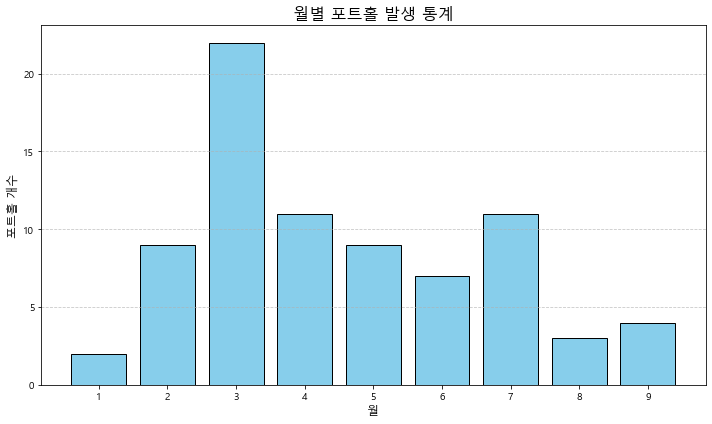

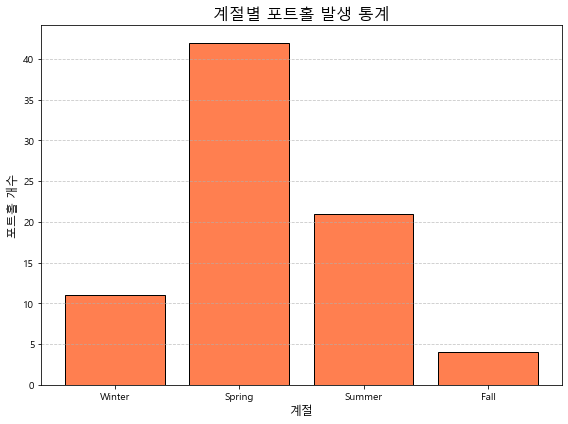

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
p_df = pd.read_csv('./processed_pothole_count_data.csv', encoding='cp949')

# 월별 통계 계산
monthly_counts = p_df.groupby('Month').size().reset_index(name='Pothole_Count')

# 계절별 통계 계산
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

p_df['Season'] = p_df['Month'].apply(get_season)
seasonal_counts = p_df.groupby('Season').size().reindex(['Winter', 'Spring', 'Summer', 'Fall']).reset_index(name='Pothole_Count')

# 월별 통계 그래프
plt.figure(figsize=(10, 6))
plt.bar(monthly_counts['Month'], monthly_counts['Pothole_Count'], color='skyblue', edgecolor='k')
plt.title("월별 포트홀 발생 통계", fontsize=16)
plt.xlabel("월", fontsize=12)
plt.ylabel("포트홀 개수", fontsize=12)
plt.xticks(monthly_counts['Month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('monthly_pothole_statistics.png')  # 그래프 저장
plt.show()

# 계절별 통계 그래프
plt.figure(figsize=(8, 6))
plt.bar(seasonal_counts['Season'], seasonal_counts['Pothole_Count'], color='coral', edgecolor='k')
plt.title("계절별 포트홀 발생 통계", fontsize=16)
plt.xlabel("계절", fontsize=12)
plt.ylabel("포트홀 개수", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('seasonal_pothole_statistics.png')  # 그래프 저장
plt.show()



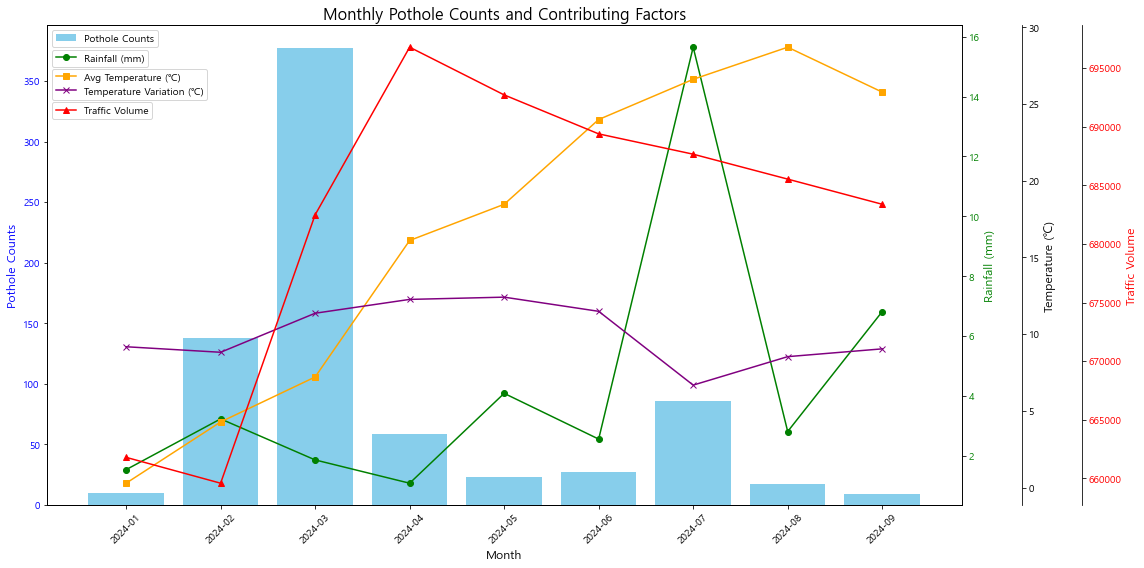

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
pothole_df = pd.read_csv('./processed_pothole_data.csv', encoding='cp949')
rainfall_df = pd.read_csv('./processed_rain_data.csv', encoding='cp949')
traffic_df = pd.read_csv('./processed_traffic_data.csv', encoding='cp949')
temperature_df = pd.read_csv('./processed_temperature_data.csv', encoding='cp949')

# 데이터 전처리: 월별 포트홀 발생 수 계산
pothole_counts = pothole_df.groupby(['Year', 'Month']).size().reset_index(name='Pothole_Count')

# 월별 강수량 평균 계산
rainfall_avg = rainfall_df.groupby(['Year', 'Month'])['강수량(mm)'].mean().reset_index()

# 월별 교통량 평균 계산
traffic_avg = traffic_df.groupby(['Year', 'Month'])['총교통량'].mean().reset_index()

# 월별 기온 데이터 계산
temperature_avg = temperature_df.groupby(['Year', 'Month'])[['평균기온(℃)', '일교차']].mean().reset_index()

# 데이터 병합
combined_df = pothole_counts.merge(rainfall_avg, on=['Year', 'Month'], how='left')
combined_df = combined_df.merge(traffic_avg, on=['Year', 'Month'], how='left')
combined_df = combined_df.merge(temperature_avg, on=['Year', 'Month'], how='left')

# 통합된 데이터프레임 저장
combined_df.to_csv('./combined_pothole_data.csv', index=False, encoding='cp949')

# 데이터 시각화
fig, ax1 = plt.subplots(figsize=(16, 8))

# 첫 번째 Y축: 포트홀 발생 수
ax1.bar(combined_df.index, combined_df['Pothole_Count'], color='skyblue', label='Pothole Counts')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Pothole Counts', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(combined_df.index)
ax1.set_xticklabels(combined_df['Year'].astype(str) + '-' + combined_df['Month'].astype(str).str.zfill(2), rotation=45)

# 두 번째 Y축: 강수량
ax2 = ax1.twinx()
ax2.plot(combined_df.index, combined_df['강수량(mm)'], color='green', marker='o', label='Rainfall (mm)')
ax2.set_ylabel('Rainfall (mm)', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')

# 세 번째 Y축: 평균기온과 일교차
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))  # 세 번째 축을 오른쪽으로 이동
ax3.plot(combined_df.index, combined_df['평균기온(℃)'], color='orange', marker='s', label='Avg Temperature (℃)')
ax3.plot(combined_df.index, combined_df['일교차'], color='purple', marker='x', label='Temperature Variation (℃)')
ax3.set_ylabel('Temperature (℃)', color='black', fontsize=12)
ax3.tick_params(axis='y', labelcolor='black')

# 네 번째 Y축: 교통량
ax4 = ax1.twinx()
ax4.spines["right"].set_position(("outward", 120))  # 네 번째 축을 더 오른쪽으로 이동
ax4.plot(combined_df.index, combined_df['총교통량'], color='red', marker='^', label='Traffic Volume')
ax4.set_ylabel('Traffic Volume', color='red', fontsize=12)
ax4.tick_params(axis='y', labelcolor='red')

# 범례 추가
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=10)
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.96), fontsize=10)
ax3.legend(loc='upper left', bbox_to_anchor=(0, 0.92), fontsize=10)
ax4.legend(loc='upper left', bbox_to_anchor=(0, 0.85), fontsize=10)

# 제목 및 레이아웃 설정
plt.title('Monthly Pothole Counts and Contributing Factors', fontsize=16)
plt.tight_layout()


# 그래프 출력
plt.show()



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# 데이터 로드
pothole_df = pd.read_csv('./processed_pothole_data.csv', encoding='cp949')
rainfall_df = pd.read_csv('./processed_rain_data.csv', encoding='cp949')
temperature_df = pd.read_csv('./processed_temperature_data.csv', encoding='cp949')
traffic_df = pd.read_csv('./processed_traffic_data.csv', encoding='cp949')

tmp_traffic_df = traffic_df[['Year', 'Month', '총교통량']]

# 데이터 병합 (교통량 데이터 제외)
merged_df = pd.merge(pothole_df, rainfall_df, on=['Year', 'Month', 'Day'], how='outer')
merged_df = pd.merge(merged_df, temperature_df, on=['Year', 'Month', 'Day'], how='outer')
merged_df = pd.merge(merged_df, tmp_traffic_df, on=['Year', 'Month'], how='outer')

# NaN 값을 0으로 대체 (필요한 경우)
merged_df = merged_df.dropna()

# 통합 데이터프레임 저장
merged_df.to_csv('./merged_pothole_location_weather_data.csv', index=False, encoding='cp949')

# 입력 데이터(X)와 출력 데이터(y) 분리
X = merged_df.drop(columns=['PLC_LTTD', 'PLC_LGTD'])  # 입력 변수에서 위도와 경도를 제거
y = merged_df[['PLC_LTTD', 'PLC_LGTD']]  # 출력 변수는 위도(LTTD)와 경도(LGTD)

# 데이터를 8:2로 분할 (학습 데이터 80%, 테스트 데이터 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest 모델 초기화
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = rf_model.predict(X_test)

# 테스트 데이터에 대한 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 출력
print("테스트 데이터에 대한 평가:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")


테스트 데이터에 대한 평가:
Mean Squared Error (MSE): 0.0006
R-squared (R2 Score): 0.4184


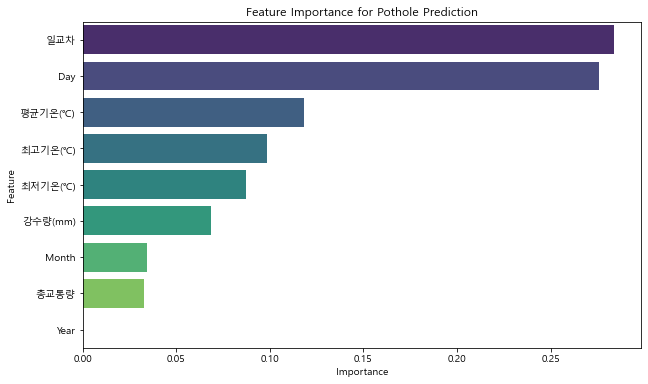

In [ ]:
import seaborn as sns

# 피쳐 중요도 추출
feature_importances = rf_model.feature_importances_

# 피쳐 중요도를 데이터프레임으로 변환하여 시각화
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 중요도 그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Pothole Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_33612\3502192229.py:75: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
e:\AJunho\python\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


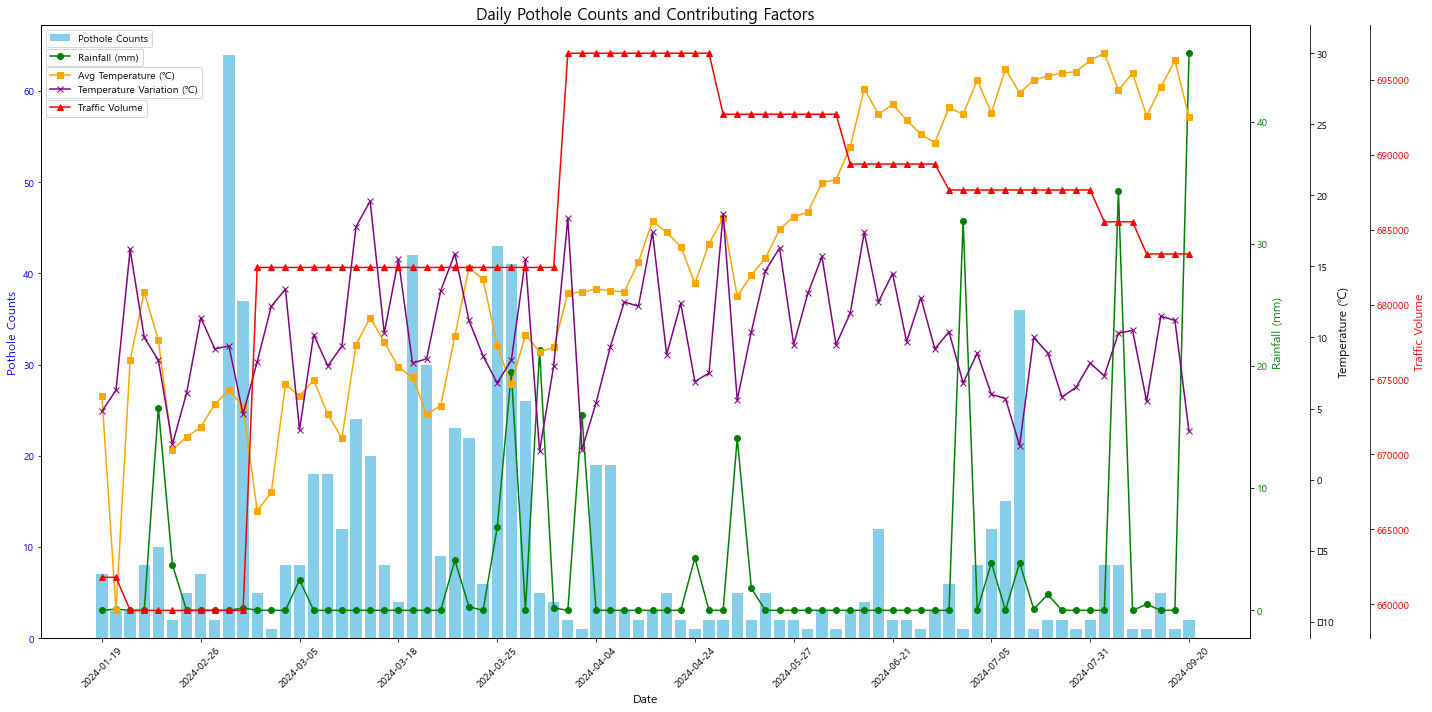

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
pothole_df = pd.read_csv('./processed_pothole_data.csv', encoding='cp949')
rainfall_df = pd.read_csv('./processed_rain_data.csv', encoding='cp949')
traffic_df = pd.read_csv('./processed_traffic_data.csv', encoding='cp949')
temperature_df = pd.read_csv('./processed_temperature_data.csv', encoding='cp949')

# 데이터 전처리: 일별 포트홀 발생 수 계산
pothole_counts = pothole_df.groupby(['Year', 'Month', 'Day']).size().reset_index(name='Pothole_Count')

# 일별 강수량 데이터 평균 계산
rainfall_daily = rainfall_df.groupby(['Year', 'Month', 'Day'])['강수량(mm)'].mean().reset_index()

# 일별 기온 데이터 평균 계산
temperature_daily = temperature_df.groupby(['Year', 'Month', 'Day'])[['평균기온(℃)', '일교차']].mean().reset_index()

# 월별 교통량 데이터를 일별로 확장
# 예: 같은 월에 있는 모든 날에 대해 동일한 값 복제
traffic_daily = pd.merge(pothole_counts[['Year', 'Month', 'Day']], traffic_df, on=['Year', 'Month'], how='left')

# 데이터 병합
dcombined_df = pothole_counts.merge(rainfall_daily, on=['Year', 'Month', 'Day'], how='left')
dcombined_df = dcombined_df.merge(temperature_daily, on=['Year', 'Month', 'Day'], how='left')
dcombined_df = dcombined_df.merge(traffic_daily[['Year', 'Month', 'Day', '총교통량']], on=['Year', 'Month', 'Day'], how='left')

# 통합된 데이터프레임 저장
dcombined_df.to_csv('./daily_combined_pothole_data.csv', index=False, encoding='cp949')

# 데이터 시각화
fig, ax1 = plt.subplots(figsize=(20, 10))

# 첫 번째 Y축: 포트홀 발생 수
ax1.bar(dcombined_df.index, dcombined_df['Pothole_Count'], color='skyblue', label='Pothole Counts')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Pothole Counts', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# x축 레이블 설정 (7일 간격)
x_ticks = dcombined_df.index[::7]
x_labels = dcombined_df['Year'].astype(str) + '-' + dcombined_df['Month'].astype(str).str.zfill(2) + '-' + dcombined_df['Day'].astype(str).str.zfill(2)
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_labels[::7], rotation=45)

# 두 번째 Y축: 강수량
ax2 = ax1.twinx()
ax2.plot(dcombined_df.index, dcombined_df['강수량(mm)'], color='green', marker='o', label='Rainfall (mm)')
ax2.set_ylabel('Rainfall (mm)', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')

# 세 번째 Y축: 평균기온과 일교차
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))  # 세 번째 축을 오른쪽으로 이동
ax3.plot(dcombined_df.index, dcombined_df['평균기온(℃)'], color='orange', marker='s', label='Avg Temperature (℃)')
ax3.plot(dcombined_df.index, dcombined_df['일교차'], color='purple', marker='x', label='Temperature Variation (℃)')
ax3.set_ylabel('Temperature (℃)', color='black', fontsize=12)
ax3.tick_params(axis='y', labelcolor='black')

# 네 번째 Y축: 교통
ax4 = ax1.twinx()
ax4.spines["right"].set_position(("outward", 120))  # 네 번째 축을 더 오른쪽으로 이동
ax4.plot(dcombined_df.index, dcombined_df['총교통량'], color='red', marker='^', label='Traffic Volume')
ax4.set_ylabel('Traffic Volume', color='red', fontsize=12)
ax4.tick_params(axis='y', labelcolor='red')

# 범례 추가
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=10)
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.97), fontsize=10)
ax3.legend(loc='upper left', bbox_to_anchor=(0, 0.94), fontsize=10)
ax4.legend(loc='upper left', bbox_to_anchor=(0, 0.887), fontsize=10)

# 제목 및 레이아웃 설정
plt.title('Daily Pothole Counts and Contributing Factors', fontsize=16)
plt.tight_layout()

# 그래프 출력
plt.show()

In [ ]:
dcombined_df

,Year,Month,Day,Pothole_Count,강수량(mm),평균기온(℃),일교차,총교통량
0,2024,1,19,7,0.0,5.9,4.8,661800
1,2024,1,23,3,0.1,-9.2,6.3,661800
2,2024,2,13,3,0.0,8.4,16.2,659595
3,2024,2,14,8,0.0,13.2,10.0,659595
4,2024,2,19,10,16.6,9.8,8.4,659595
...,...,...,...,...,...,...,...,...
73,2024,8,6,1,0.0,28.6,10.5,685522
74,2024,9,6,1,0.5,25.6,5.5,683377
75,2024,9,8,5,0.0,27.6,11.5,683377
76,2024,9,10,1,0.0,29.5,11.2,683377


e:\AJunho\python\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
e:\AJunho\python\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


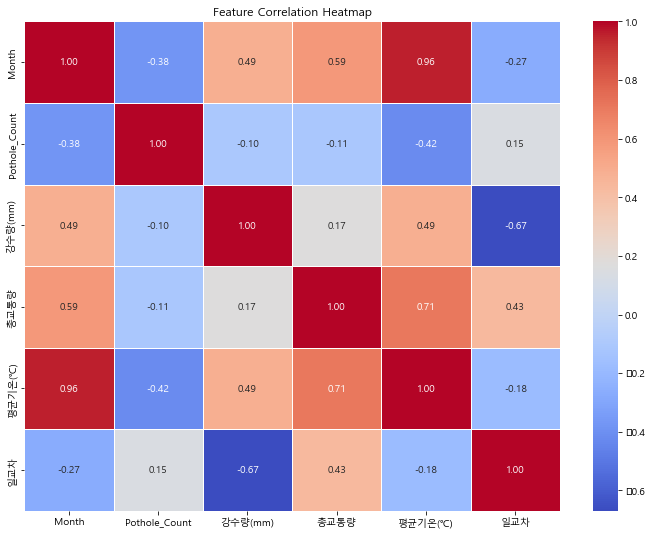

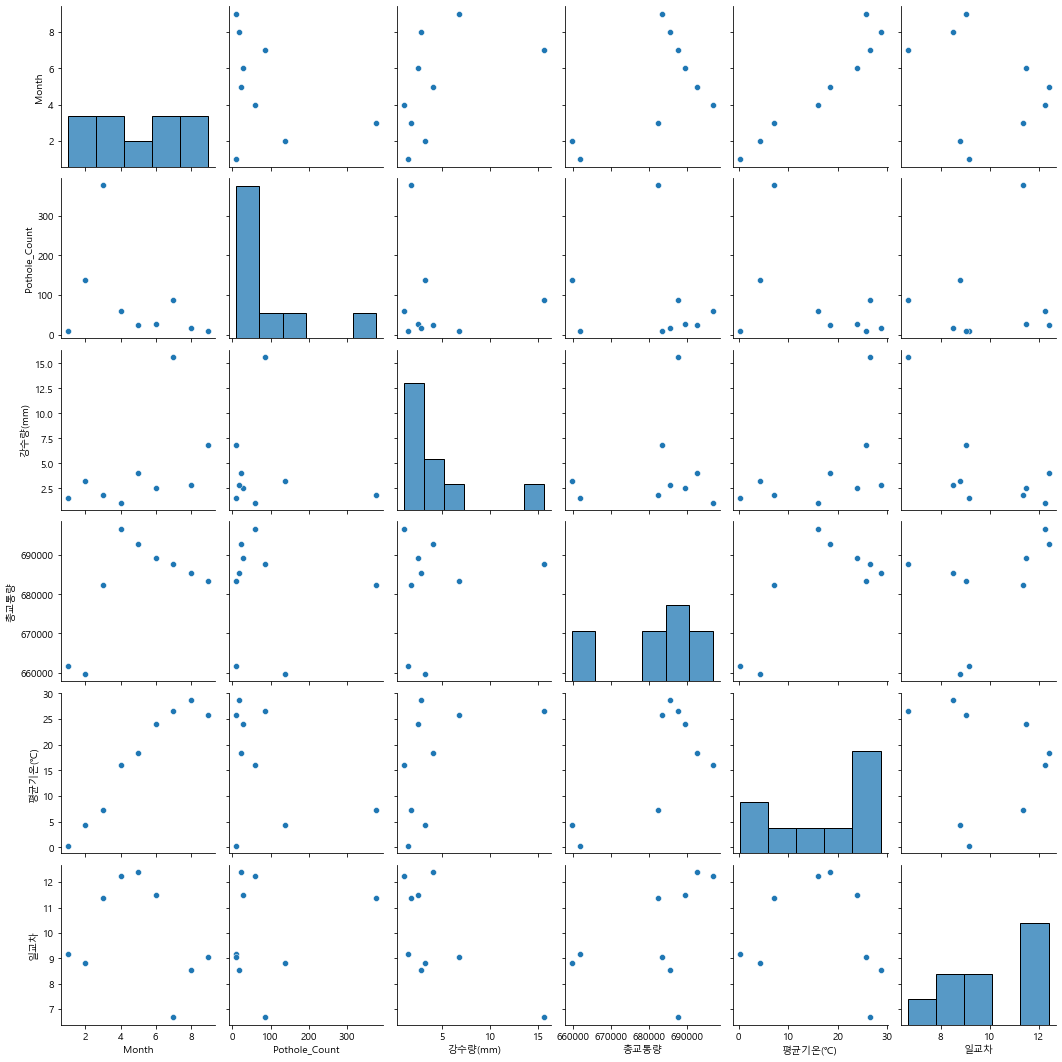

In [ ]:
import seaborn as sns

dcombined_df = pd.read_csv('./combined_pothole_data.csv',encoding='cp949')

# 상관계수 계산
correlation_matrix = dcombined_df.drop(columns=['Year']).corr()

# 히트맵 시각화
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

plt.rcParams['figure.figsize'] = (20,10)
sns.pairplot(dcombined_df.drop(columns=['Year']))

In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 후보군 설정
param_grid = {
    'n_estimators': [50, 100, 200],  # 트리 개수
    'max_depth': [10, 20, 30],  # 최대 깊이
    'min_samples_split': [10, 20, 30],  # 노드를 나누는 최소 샘플 수
    'min_samples_leaf': [10, 20, 40]  # 리프 노드의 최소 샘플 수
}

# RandomForestRegressor 모델 초기화
rf_model = RandomForestRegressor(random_state=42)

# GridSearchCV 초기화
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='r2',  # 평가 지표로 R-squared 사용
    cv=3,  # 3-fold 교차 검증
    verbose=2,
    n_jobs=-1  # 모든 CPU 코어 사용
)

# 그리드 탐색 실행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 성능 출력
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

# 테스트 데이터에서 최적 모델 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n테스트 데이터에 대한 평가:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best R2 Score: 0.23394924418817054

테스트 데이터에 대한 평가:
Mean Squared Error (MSE): 0.0006
R-squared (R2 Score): 0.3973


In [1]:
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# 데이터 로드
pothole_df = pd.read_csv('./processed_pothole_data.csv', encoding='cp949')
rainfall_df = pd.read_csv('./processed_rain_data.csv', encoding='cp949')
temperature_df = pd.read_csv('./processed_temperature_data.csv', encoding='cp949')
traffic_df = pd.read_csv('./processed_traffic_data.csv', encoding='cp949')

tmp_traffic_df = traffic_df[['Year', 'Month', '총교통량']]

# 데이터 병합
merged_df = pd.merge(pothole_df, rainfall_df, on=['Year', 'Month', 'Day'], how='outer')
merged_df = pd.merge(merged_df, temperature_df, on=['Year', 'Month', 'Day'], how='outer')
merged_df = pd.merge(merged_df, tmp_traffic_df, on=['Year', 'Month'], how='outer')

# NaN 값 제거
merged_df = merged_df.dropna()

# 입력 데이터(X)와 출력 데이터(y) 분리
X = merged_df.drop(columns=['PLC_LTTD', 'PLC_LGTD'])  # 입력 변수
y = merged_df[['PLC_LTTD', 'PLC_LGTD']]  # 출력 변수

# 데이터를 8:2로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 위도와 경도를 각각 분리
y_train_lat, y_train_lon = y_train['PLC_LTTD'], y_train['PLC_LGTD']
y_test_lat, y_test_lon = y_test['PLC_LTTD'], y_test['PLC_LGTD']

# 스케일링 + 모델 학습
def train_ensemble_model_with_scaling(X_train, y_train, X_test, y_test):
    # 개별 모델 초기화
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    xgb_model = XGBRegressor(n_estimators=100, random_state=42)

    # Pipeline에 StandardScaler 포함
    rf_pipeline = Pipeline([('scaler', StandardScaler()), ('model', rf_model)])
    gb_pipeline = Pipeline([('scaler', StandardScaler()), ('model', gb_model)])
    xgb_pipeline = Pipeline([('scaler', StandardScaler()), ('model', xgb_model)])

    # 개별 모델 학습
    rf_pipeline.fit(X_train, y_train)
    gb_pipeline.fit(X_train, y_train)
    xgb_pipeline.fit(X_train, y_train)

    # 개별 모델 평가
    rf_pred = rf_pipeline.predict(X_test)
    gb_pred = gb_pipeline.predict(X_test)
    xgb_pred = xgb_pipeline.predict(X_test)

    print("\n개별 모델 성능:")
    print(f"Random Forest R2: {r2_score(y_test, rf_pred):.4f}")
    print(f"Gradient Boosting R2: {r2_score(y_test, gb_pred):.4f}")
    print(f"XGBoost R2: {r2_score(y_test, xgb_pred):.4f}")

    # 앙상블 모델 정의
    voting_model = VotingRegressor(
        estimators=[
            ('rf', rf_pipeline),
            ('gb', gb_pipeline),
            ('xgb', xgb_pipeline)
        ]
    )

    # 앙상블 모델 학습
    voting_model.fit(X_train, y_train)

    # 앙상블 모델 평가
    voting_pred = voting_model.predict(X_test)
    mse = mean_squared_error(y_test, voting_pred)
    r2 = r2_score(y_test, voting_pred)

    print("\n앙상블 모델 성능:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R2 Score): {r2:.4f}")

    return voting_model

# 위도(PLC_LTTD) 모델 학습
print("위도(PLC_LTTD) 모델 학습")
ensemble_model_lat = train_ensemble_model_with_scaling(X_train, y_train_lat, X_test, y_test_lat)

# 경도(PLC_LGTD) 모델 학습
print("\n경도(PLC_LGTD) 모델 학습")
ensemble_model_lon = train_ensemble_model_with_scaling(X_train, y_train_lon, X_test, y_test_lon)


위도(PLC_LTTD) 모델 학습

개별 모델 성능:
Random Forest R2: 0.4440
Gradient Boosting R2: 0.4165
XGBoost R2: 0.4376

앙상블 모델 성능:
Mean Squared Error (MSE): 0.0005
R-squared (R2 Score): 0.4358

경도(PLC_LGTD) 모델 학습

개별 모델 성능:
Random Forest R2: 0.3953
Gradient Boosting R2: 0.3841
XGBoost R2: 0.3973

앙상블 모델 성능:
Mean Squared Error (MSE): 0.0007
R-squared (R2 Score): 0.3953


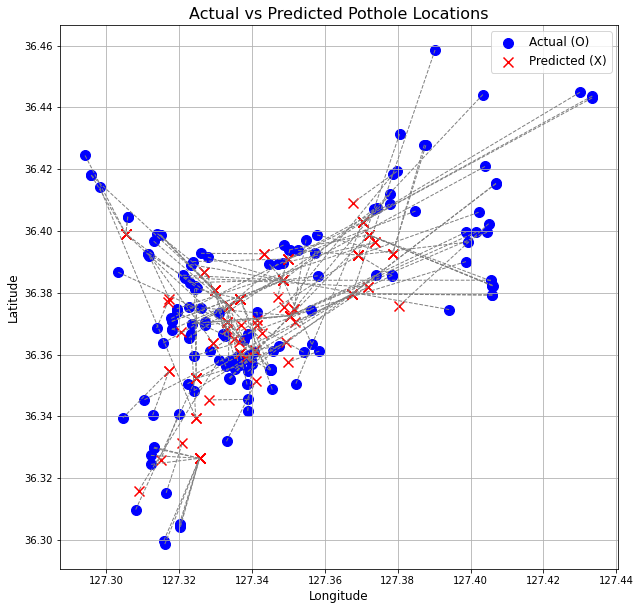

In [4]:
import matplotlib.pyplot as plt

# 예측값과 실제값 준비
y_test_lat = y_test['PLC_LTTD'].values
y_test_lon = y_test['PLC_LGTD'].values
y_pred_lat = y_pred[:, 0]  # 예측된 위도
y_pred_lon = y_pred[:, 1]  # 예측된 경도

# 시각화
plt.figure(figsize=(10, 10))

# 실제값: O로 표시
plt.scatter(y_test_lon, y_test_lat, color='blue', label='Actual (O)', marker='o', s=100)

# 예측값: X로 표시
plt.scatter(y_pred_lon, y_pred_lat, color='red', label='Predicted (X)', marker='x', s=100)

# 실제값과 예측값 연결
for actual, predicted in zip(zip(y_test_lon, y_test_lat), zip(y_pred_lon, y_pred_lat)):
    plt.plot([actual[0], predicted[0]], [actual[1], predicted[1]], color='gray', linestyle='--', linewidth=1)

# 레이블 및 제목
plt.title('Actual vs Predicted Pothole Locations', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# 그래프 출력
plt.show()
